# Fraud Detection Pipeline Demo

This notebook demonstrates the fraud detection pipeline.

In [2]:
import sys
sys.path.append('..')

from src.pipeline import FraudDetectionPipeline, run_pipeline
from src.data_pipeline import DataPipeline
from src.evaluation import ModelEvaluator
from src.utils import load_config
import pandas as pd

## Load Configuration

In [3]:
config = load_config('../config.yaml')
print("Configuration loaded successfully")

2025-07-27 21:26:49,358 - src.utils - INFO - Configuration loaded from ../config.yaml


Configuration loaded successfully


## Process Data

In [4]:
# Initialize data pipeline
data_pipeline = DataPipeline()

# Load and process fraud data
data = data_pipeline.load_data(
    fraud_path='../data/raw/Fraud_Data.csv',
    ip_path='../data/raw/IpAddress_to_Country.csv'
)

df = data_pipeline.process_fraud_data(data['fraud'])
df = data_pipeline.clean_data(df)

print(f"Processed data shape: {df.shape}")
print(f"Target distribution: {df['class'].value_counts()}")

2025-07-27 21:26:53,570 - src.data_pipeline - INFO - Loaded fraud data: (151112, 11)
2025-07-27 21:26:53,659 - src.data_pipeline - INFO - Loaded IP country data: (138846, 3)


Processed data shape: (151112, 18)
Target distribution: class
0    136961
1     14151
Name: count, dtype: int64


## Train Model Pipeline

In [8]:
import pandas as pd
data = pd.read_csv('../data/processed/fraud_processed_demo.csv')
data

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_diff_hours,purchase_hour,purchase_day,ip_int,country,user_tx_count,user_avg_amount,user_std_amount,user_fraud_rate
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,1251.856111,2,5,0,Other,1,34.0,0.0,0.0
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,4.984444,1,0,0,Other,1,16.0,0.0,0.0
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0.000278,18,3,0,Other,1,15.0,0.0,1.0
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,136.690278,13,0,0,Other,1,44.0,0.0,0.0
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1211.516944,18,2,0,Other,1,39.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,1461.453611,0,6,0,Other,1,43.0,0.0,1.0
151108,274471,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,258.686111,12,1,0,Other,1,35.0,0.0,0.0
151109,368416,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,1856.004444,7,2,0,Other,1,40.0,0.0,0.0
151110,207709,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,1429.477500,9,0,0,Other,1,46.0,0.0,0.0


In [7]:
# Save processed data
df.to_csv('../data/processed/fraud_processed_demo.csv', index=False)

# Run pipeline
pipeline, test_data = run_pipeline(
    '../data/processed/fraud_processed_demo.csv', 
    'class', 
    config, 
    'xgboost'
)

AUC Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27393
           1       1.00      1.00      1.00      2830

    accuracy                           1.00     30223
   macro avg       1.00      1.00      1.00     30223
weighted avg       1.00      1.00      1.00     30223



## Evaluate Model

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27393
           1       0.96      0.70      0.81      2830

    accuracy                           0.97     30223
   macro avg       0.96      0.85      0.90     30223
weighted avg       0.97      0.97      0.97     30223


AUC-ROC: 0.9910
AUC-PR: 0.9647


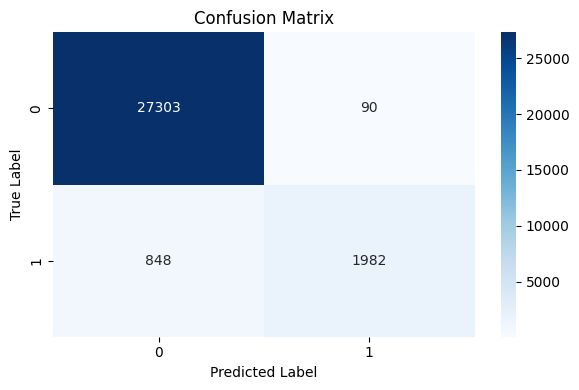

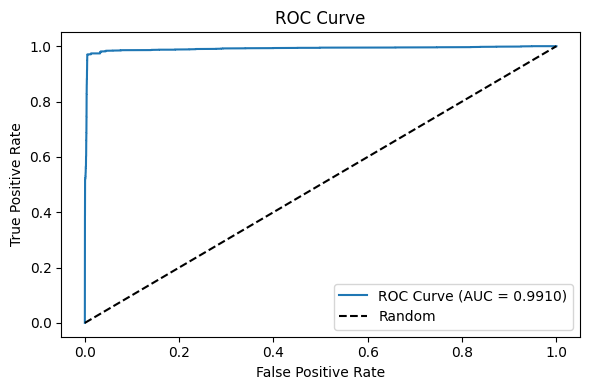

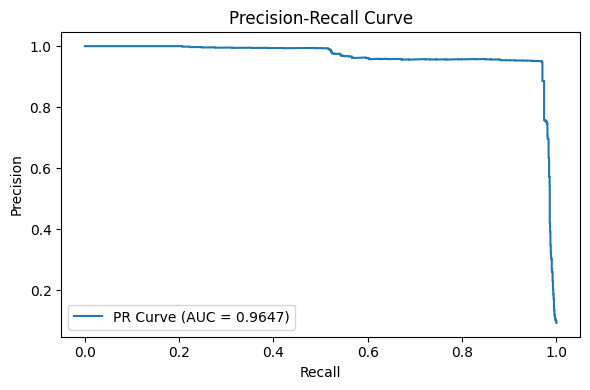

In [6]:
X_test, y_test = test_data
evaluator = ModelEvaluator(pipeline, X_test, y_test)

# Print metrics
evaluator.print_metrics()

# Plot evaluation charts
evaluator.plot_confusion_matrix()
evaluator.plot_roc_curve()
evaluator.plot_precision_recall_curve()